In [1]:
import numpy as np
import random
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import norm
# from sklearn.neighbors import KernelDensity

from astropy.visualization import hist

### A Gaussian Integral

first question:

(array([3.99811646e-01, 3.96862676e-01, 3.95062538e-01, 3.94230313e-01,
        3.88323326e-01, 3.79404047e-01, 3.75342428e-01, 3.62524357e-01,
        3.56644508e-01, 3.51144588e-01, 3.39782910e-01, 3.25951696e-01,
        3.16064503e-01, 3.01518661e-01, 2.89768009e-01, 2.75430223e-01,
        2.63073494e-01, 2.48527652e-01, 2.36668449e-01, 2.22782959e-01,
        2.09594005e-01, 1.97173955e-01, 1.86219344e-01, 1.70687496e-01,
        1.58683558e-01, 1.48045554e-01, 1.38456877e-01, 1.26208699e-01,
        1.15471190e-01, 1.04941737e-01, 9.69180049e-02, 8.64880572e-02,
        8.01559120e-02, 7.11914036e-02, 6.38551611e-02, 5.98387719e-02,
        5.15527077e-02, 4.70297468e-02, 4.16293316e-02, 3.65636154e-02,
        3.34789561e-02, 2.92364189e-02, 2.50029275e-02, 2.20901407e-02,
        1.89150222e-02, 1.71239297e-02, 1.46272554e-02, 1.27366577e-02,
        1.07917846e-02, 1.00047894e-02, 8.94641654e-03, 6.82062495e-03,
        5.76225211e-03, 5.20140497e-03, 4.23349135e-03, 3.564093

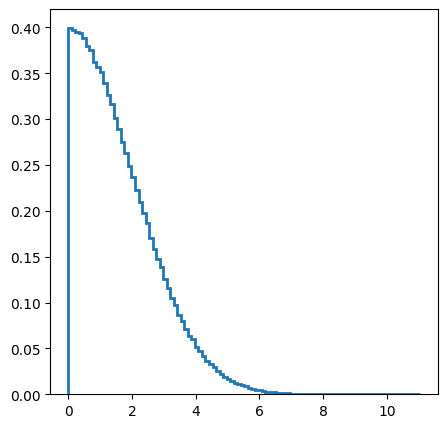

In [3]:
#p(x)-> Half Gaussian
N=1000000
sigma=2
p_x=norm(0,sigma)
x_i=p_x.rvs(size=N*2)
x_i=(x_i[x_i>0])
fig,ax = plt.subplots(figsize=(5, 5))
ax.hist(x_i,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')

In [4]:
#compute monte carlo integration
I=sigma*(np.pi/2)**0.5*np.mean(x_i**3)
print(I, 2*sigma**4)

31.933369544199174 32


In [ ]:
def Integral(sigma,samples):
    p_x=norm(0,sigma)
    x_i=p_x.rvs(size=samples*2)
    x_i=x_i[x_i>0]
    normalization=sigma*(np.pi/2)**0.5
    I= normalization*np.mean(x_i**3)
    return I


33.870118517368496 32


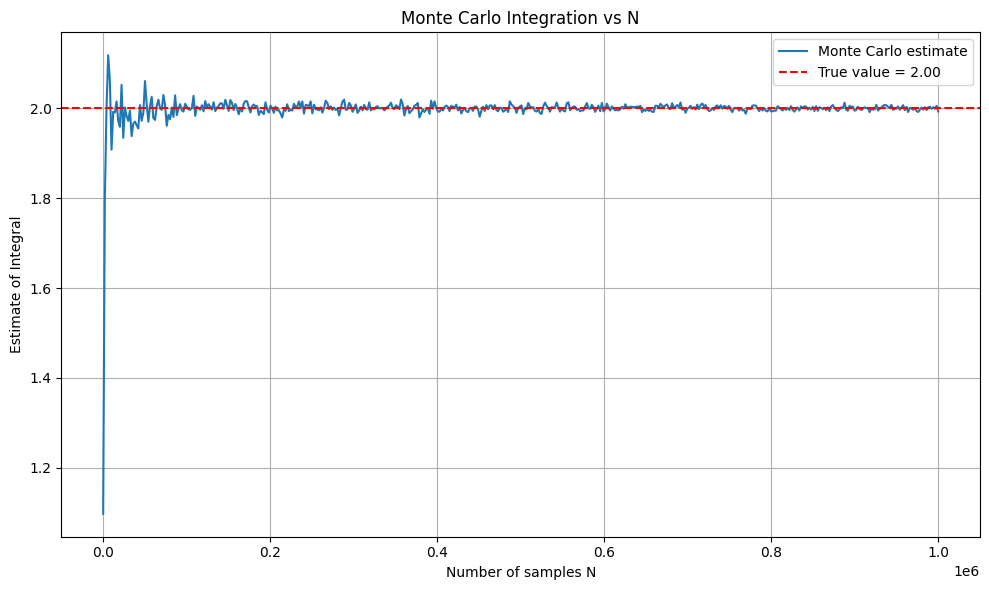

In [51]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 1
Ns = np.linspace(10, 1e6, 500, dtype=int) 




values=[]
for N in Ns:
    values.append(Integral(sigma, N))

True_value= 2 * sigma**4


plt.figure(figsize=(10, 6))
plt.plot(Ns, values, label='Monte Carlo estimate')
plt.axhline(True_value, color='red', linestyle='--', label=f'True value = {True_value:.2f}')
plt.xlabel('Number of samples N')
plt.ylabel(r'Estimate of Integral')
plt.title('Monte Carlo Integration vs N')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[]

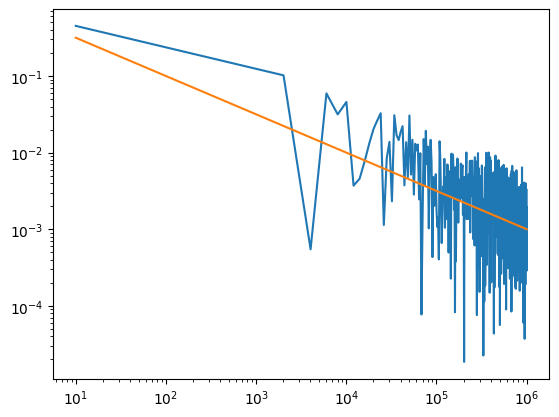

In [52]:
values=np.array(values)
error=np.abs(values-True_value)/True_value
plt.plot(Ns, error)
plt.plot(Ns, Ns**-0.5)
plt.loglog()


(array([0.82835677, 2.21258452, 3.44422024, 4.828448  , 5.71130192,
        6.35436836, 6.11458087, 6.95383707, 6.00558656, 5.99468713,
        6.01648599, 5.11183321, 4.80664913, 4.62135881, 4.03278952,
        3.66220886, 3.69490716, 2.8338521 , 2.62676291, 2.35427713,
        2.53956746, 1.86380273, 1.68941183, 1.65671353, 1.30793174,
        1.29703231, 1.00274767, 0.89375335, 0.99184823, 0.85015563,
        0.63216701, 0.61036814, 0.61036814, 0.4904744 , 0.44687668,
        0.40327895, 0.37058066, 0.29428464, 0.35968123, 0.29428464,
        0.16349147, 0.1416926 , 0.1416926 , 0.16349147, 0.09809488,
        0.15259204, 0.15259204, 0.09809488, 0.11989374, 0.08719545,
        0.04359772, 0.10899431, 0.05449716, 0.07629602, 0.06539659,
        0.07629602, 0.03269829, 0.02179886, 0.03269829, 0.03269829,
        0.03269829, 0.04359772, 0.04359772, 0.01089943, 0.01089943,
        0.02179886, 0.02179886, 0.01089943, 0.01089943, 0.        ,
        0.02179886, 0.        , 0.01089943, 0.  

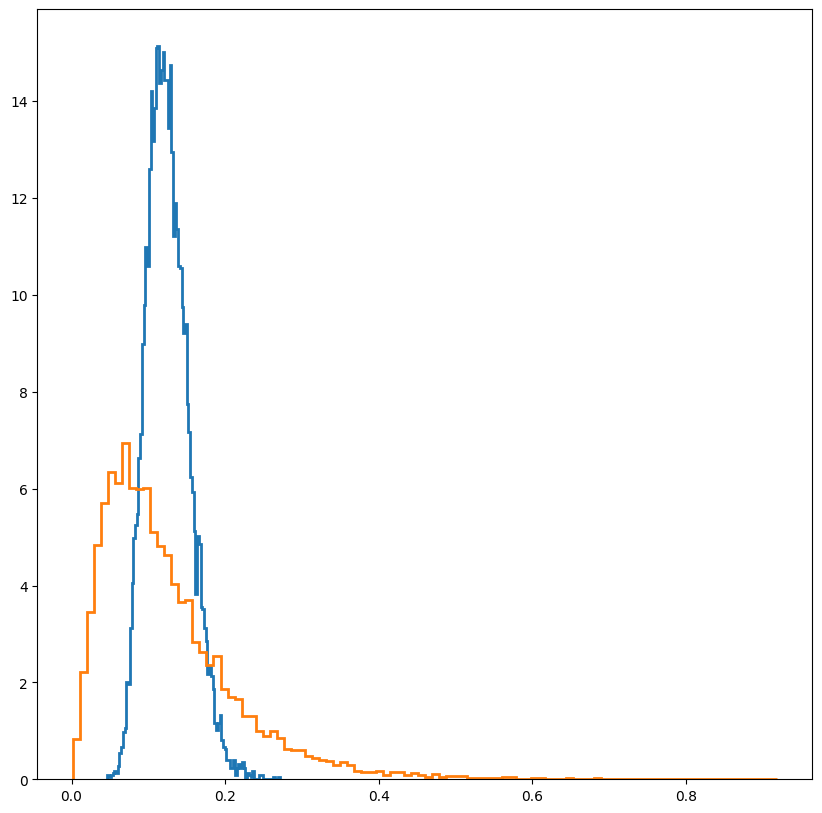

In [65]:
sigma=0.5
N_samples_low=10#fixed
N_samples_high=100
values_high=[]
values_low=[]
iterations=10000
for n in range(iterations):
    values_high.append(Integral(sigma, N_samples_high))
    values_low.append(Integral(sigma,N_samples_low))
fig,ax = plt.subplots(figsize=(10, 10))
ax.hist(values_high,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')
ax.hist(values_low,density=True,color='C1',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')


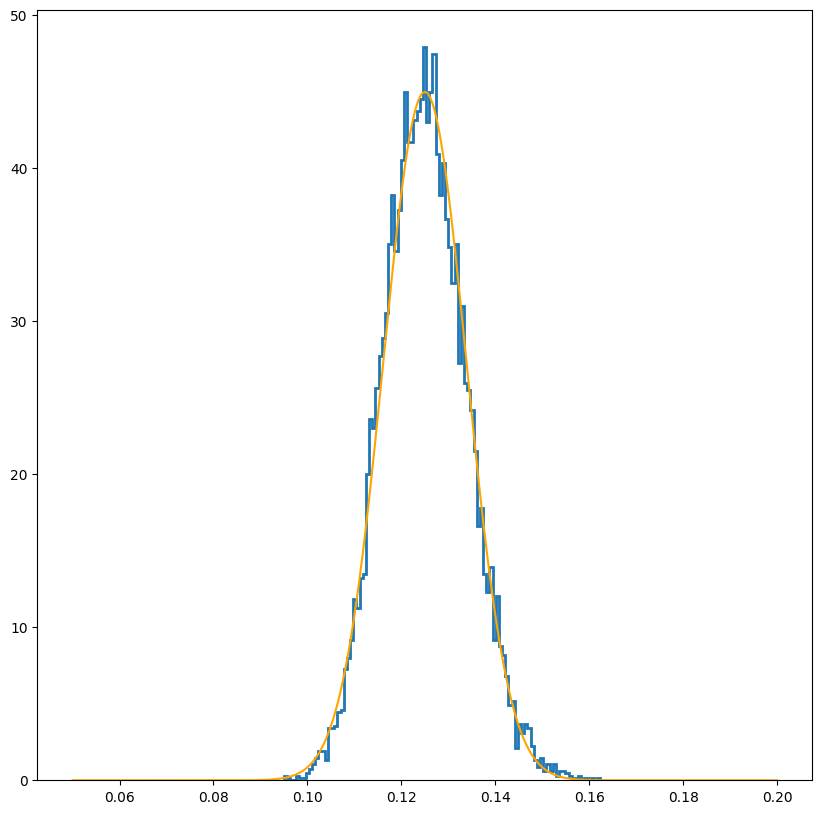

In [75]:

sigma=0.5
True_value=2*sigma**4
N_samples=1000
values=[]

iterations=10000
for n in range(iterations):
    
    values.append(Integral(sigma,N_samples))

mu=np.mean(values)
std=np.std(values)
Gaussian=norm(mu, std)
xgrid = np.linspace(0.05,0.2,1000) 
pdf=Gaussian.pdf(xgrid)
fig,ax = plt.subplots(figsize=(10, 10))

ax.hist(values,density=True,color='C0',bins=100,histtype='step',lw=2, label='Histogram, 100 bins')
ax.plot(xgrid, pdf, color="orange")

### Horse Kick

Text(0, 0.5, 'Number of groups')

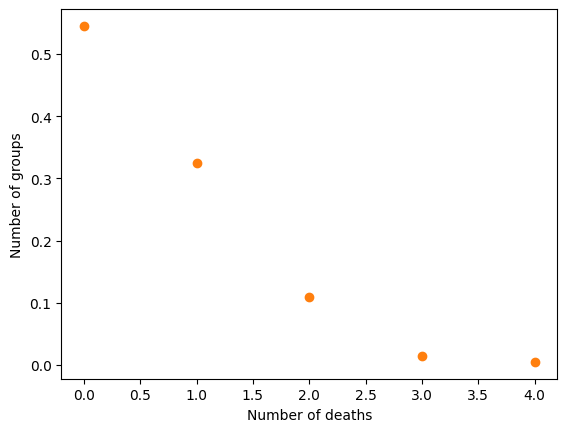

In [82]:
N_deaths=np.array([0,1,2,3,4])
N_groups=np.array([109, 65, 22, 3, 1])
total=200
group_normalization=N_groups/total
plt.plot(N_deaths, group_normalization, 'o', color='C1', label='Normalized Data')
plt.xlabel('Number of deaths')
plt.ylabel('Number of groups')

It can be fitted with a Poissonian Distribution with a low value of mu

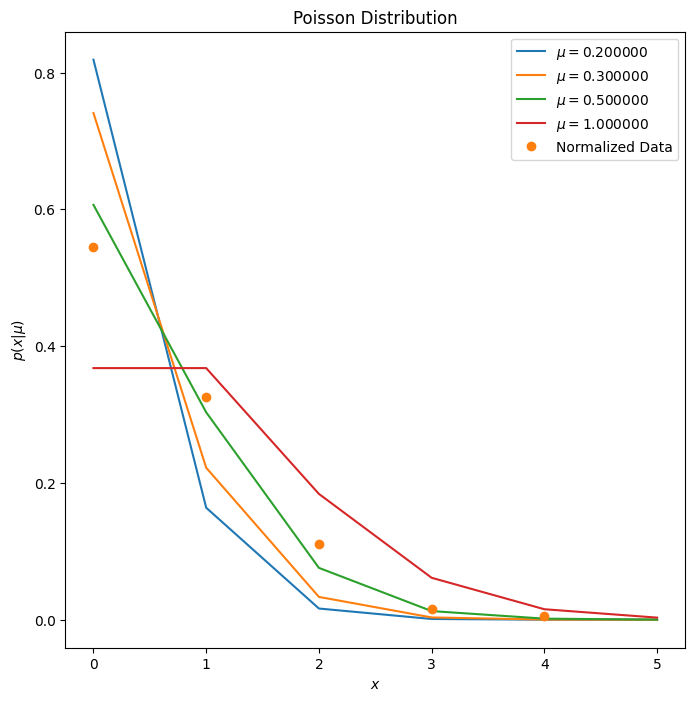

In [95]:
mu_values = [0.2, 0.3 , 0.5, 1]

from scipy.stats import poisson

fig, ax = plt.subplots(figsize=(8,8))

for mu in mu_values:

    dist = poisson(mu)
    x = np.arange(0, 6)

    plt.plot(x, dist.pmf(x), 
             label=r'$\mu=%f$' % mu)

    
plt.plot(N_deaths, group_normalization, 'o', color='C1', label='Normalized Data')


plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

It seems that the best fit is with mu=0.5

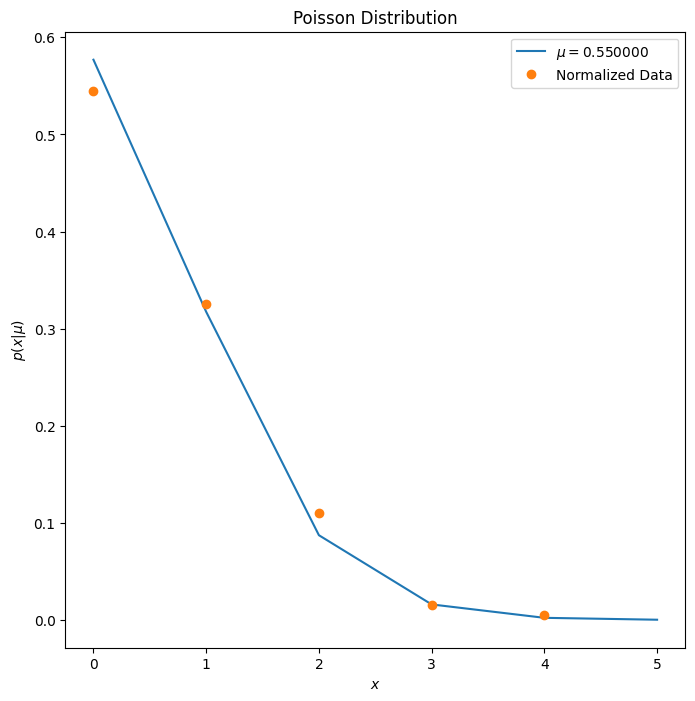

In [99]:
mu_values = [0.55]

from scipy.stats import poisson

fig, ax = plt.subplots(figsize=(8,8))

for mu in mu_values:

    dist = poisson(mu)
    x = np.arange(0, 6)

    plt.plot(x, dist.pmf(x), 
             label=r'$\mu=%f$' % mu)

    
plt.plot(N_deaths, group_normalization, 'o', color='C1', label='Normalized Data')


plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()